In [1]:
import numpy as np
import pandas as pd

## Object creation
Creating a `Series` by passing a list of values, letting pandas create a default integer index:

In [2]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creating a `DataFrame` by passing a NumPy array, with a datetime index and labeled columns:

In [3]:
dates = pd.date_range('20200105', periods=6)
dates

DatetimeIndex(['2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10'],
              dtype='datetime64[ns]', freq='D')

In [4]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2020-01-05,-0.529592,0.813925,-0.967297,-0.149514
2020-01-06,0.054096,-1.846216,-1.273814,1.810544
2020-01-07,0.391069,-0.654764,0.883613,1.128347
2020-01-08,-0.403109,-0.696628,-0.476275,0.338764
2020-01-09,0.322251,-0.423799,-0.186723,0.690281
2020-01-10,1.068257,1.071434,-1.918984,-0.187414


Creating a `DataFrame` by passing a dict of objects that can be converted to series-like.

In [5]:
df2 = pd.DataFrame({'A': 1.,
                    'B': pd.Timestamp('20200106'),
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                    'D': np.array([3] * 4, dtype='int32'),
                    'E': pd.Categorical(["happy", "new", "year", "yeah"]),
                    'F': 'foo'})
df2

,A,B,C,D,E,F
0,1.0,2020-01-06,1.0,3,happy,foo
1,1.0,2020-01-06,1.0,3,new,foo
2,1.0,2020-01-06,1.0,3,year,foo
3,1.0,2020-01-06,1.0,3,yeah,foo


The columns of the resulting DataFrame have different dtypes.

In [6]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

use tab to prompt
> df2.<TAB>  # noqa: E225, E999

## Viewing data

In [7]:
df.head(3)

,A,B,C,D
2020-01-05,-0.529592,0.813925,-0.967297,-0.149514
2020-01-06,0.054096,-1.846216,-1.273814,1.810544
2020-01-07,0.391069,-0.654764,0.883613,1.128347


In [8]:
df.tail(3)

,A,B,C,D
2020-01-08,-0.403109,-0.696628,-0.476275,0.338764
2020-01-09,0.322251,-0.423799,-0.186723,0.690281
2020-01-10,1.068257,1.071434,-1.918984,-0.187414


In [9]:
df.index

DatetimeIndex(['2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10'],
              dtype='datetime64[ns]', freq='D')

In [10]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [11]:
df.values

array([[-0.52959153,  0.8139254 , -0.96729652, -0.14951377],
       [ 0.05409598, -1.84621578, -1.27381429,  1.8105444 ],
       [ 0.39106887, -0.65476392,  0.88361314,  1.12834739],
       [-0.40310939, -0.69662847, -0.47627511,  0.33876378],
       [ 0.32225072, -0.42379884, -0.18672311,  0.69028133],
       [ 1.06825722,  1.07143418, -1.91898408, -0.18741355]])

In [13]:
df.to_numpy()

array([[-0.52959153,  0.8139254 , -0.96729652, -0.14951377],
       [ 0.05409598, -1.84621578, -1.27381429,  1.8105444 ],
       [ 0.39106887, -0.65476392,  0.88361314,  1.12834739],
       [-0.40310939, -0.69662847, -0.47627511,  0.33876378],
       [ 0.32225072, -0.42379884, -0.18672311,  0.69028133],
       [ 1.06825722,  1.07143418, -1.91898408, -0.18741355]])

In [12]:
df2.to_numpy()

array([[1.0, Timestamp('2020-01-06 00:00:00'), 1.0, 3, 'happy', 'foo'],
       [1.0, Timestamp('2020-01-06 00:00:00'), 1.0, 3, 'new', 'foo'],
       [1.0, Timestamp('2020-01-06 00:00:00'), 1.0, 3, 'year', 'foo'],
       [1.0, Timestamp('2020-01-06 00:00:00'), 1.0, 3, 'yeah', 'foo']],
      dtype=object)

describe() shows a quick statistic summary of your data:

In [14]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.150495,-0.289341,-0.656580,0.605168
std,0.584457,1.077985,0.969191,0.774932
min,-0.529592,-1.846216,-1.918984,-0.187414
25%,-0.288808,-0.686162,-1.197185,-0.027444
50%,0.188173,-0.539281,-0.721786,0.514523
75%,0.373864,0.504494,-0.259111,1.018831
max,1.068257,1.071434,0.883613,1.810544


In [15]:
df2.describe()

,A,C,D
count,4.0,4.0,4.0
mean,1.0,1.0,3.0
std,0.0,0.0,0.0
min,1.0,1.0,3.0
25%,1.0,1.0,3.0
50%,1.0,1.0,3.0
75%,1.0,1.0,3.0
max,1.0,1.0,3.0


Transposing your data:

In [16]:
df.T

,2020-01-05,2020-01-06,2020-01-07,2020-01-08,2020-01-09,2020-01-10
A,-0.529592,0.054096,0.391069,-0.403109,0.322251,1.068257
B,0.813925,-1.846216,-0.654764,-0.696628,-0.423799,1.071434
C,-0.967297,-1.273814,0.883613,-0.476275,-0.186723,-1.918984
D,-0.149514,1.810544,1.128347,0.338764,0.690281,-0.187414


Sorting by an axis:

In [17]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2020-01-05,-0.149514,-0.967297,0.813925,-0.529592
2020-01-06,1.810544,-1.273814,-1.846216,0.054096
2020-01-07,1.128347,0.883613,-0.654764,0.391069
2020-01-08,0.338764,-0.476275,-0.696628,-0.403109
2020-01-09,0.690281,-0.186723,-0.423799,0.322251
2020-01-10,-0.187414,-1.918984,1.071434,1.068257


Sorting by values:

In [18]:
df.sort_values(by='B')

,A,B,C,D
2020-01-06,0.054096,-1.846216,-1.273814,1.810544
2020-01-08,-0.403109,-0.696628,-0.476275,0.338764
2020-01-07,0.391069,-0.654764,0.883613,1.128347
2020-01-09,0.322251,-0.423799,-0.186723,0.690281
2020-01-05,-0.529592,0.813925,-0.967297,-0.149514
2020-01-10,1.068257,1.071434,-1.918984,-0.187414


## Selection
### Getting
Selecting a single column, which yields a Series, equivalent to df.A:

In [19]:
df['A']

2020-01-05   -0.529592
2020-01-06    0.054096
2020-01-07    0.391069
2020-01-08   -0.403109
2020-01-09    0.322251
2020-01-10    1.068257
Freq: D, Name: A, dtype: float64

Selecting via [], which slices the rows.

In [20]:
df[1:3]

,A,B,C,D
2020-01-06,0.054096,-1.846216,-1.273814,1.810544
2020-01-07,0.391069,-0.654764,0.883613,1.128347


In [21]:
df['20200107': '20200109']

,A,B,C,D
2020-01-07,0.391069,-0.654764,0.883613,1.128347
2020-01-08,-0.403109,-0.696628,-0.476275,0.338764
2020-01-09,0.322251,-0.423799,-0.186723,0.690281


### Selection by label
For getting a cross section using a label:

In [22]:
df.loc[dates[0]]

A   -0.529592
B    0.813925
C   -0.967297
D   -0.149514
Name: 2020-01-05 00:00:00, dtype: float64

In [23]:
df

,A,B,C,D
2020-01-05,-0.529592,0.813925,-0.967297,-0.149514
2020-01-06,0.054096,-1.846216,-1.273814,1.810544
2020-01-07,0.391069,-0.654764,0.883613,1.128347
2020-01-08,-0.403109,-0.696628,-0.476275,0.338764
2020-01-09,0.322251,-0.423799,-0.186723,0.690281
2020-01-10,1.068257,1.071434,-1.918984,-0.187414


In [24]:
df.loc[dates[0]]

A   -0.529592
B    0.813925
C   -0.967297
D   -0.149514
Name: 2020-01-05 00:00:00, dtype: float64

Selecting on a multi-axis by label:

In [28]:
df.loc[:, ['A', 'B']]

,A,B
2020-01-05,-0.529592,0.813925
2020-01-06,0.054096,-1.846216
2020-01-07,0.391069,-0.654764
2020-01-08,-0.403109,-0.696628
2020-01-09,0.322251,-0.423799
2020-01-10,1.068257,1.071434


Showing label slicing, both endpoints are included:

In [29]:
df.loc['20200107': '20200109', ['A', 'B']]

,A,B
2020-01-07,0.391069,-0.654764
2020-01-08,-0.403109,-0.696628
2020-01-09,0.322251,-0.423799


Reduction in the dimensions of the returned object:

In [30]:
df.loc['20200106', ['A']]

A    0.054096
Name: 2020-01-06 00:00:00, dtype: float64

For getting a scalar value:

In [31]:
df.loc[dates[0], 'A']

-0.5295915328952078

For getting fast access to a scalar (equivalent to the prior method):

In [32]:
df.at[dates[0], 'A']

-0.5295915328952078

In [ ]:
### Selection by position
Select via the position of the passed integers:

In [33]:
df.iloc[3]

A   -0.403109
B   -0.696628
C   -0.476275
D    0.338764
Name: 2020-01-08 00:00:00, dtype: float64

By integer slices, acting similar to numpy/python:

In [34]:
df.iloc[3:5, 0:2]

,A,B
2020-01-08,-0.403109,-0.696628
2020-01-09,0.322251,-0.423799


By lists of integer position locations, similar to the numpy/python style:

In [35]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2020-01-06,0.054096,-1.273814
2020-01-07,0.391069,0.883613
2020-01-09,0.322251,-0.186723


In [36]:
df.iloc[1:3, :]

,A,B,C,D
2020-01-06,0.054096,-1.846216,-1.273814,1.810544
2020-01-07,0.391069,-0.654764,0.883613,1.128347


In [37]:
df.iloc[:, 1:3]

,B,C
2020-01-05,0.813925,-0.967297
2020-01-06,-1.846216,-1.273814
2020-01-07,-0.654764,0.883613
2020-01-08,-0.696628,-0.476275
2020-01-09,-0.423799,-0.186723
2020-01-10,1.071434,-1.918984


In [38]:
# For getting a value explicitly:
df.iloc[1,1]

-1.8462157767970178

In [39]:
# For getting fast access to a scalar (equivalent to the prior method):
df.iat[1,1]

-1.8462157767970178

### Boolean indexing
Using a single column’s values to select data.

In [40]:
df[df['A'] > 0]

,A,B,C,D
2020-01-06,0.054096,-1.846216,-1.273814,1.810544
2020-01-07,0.391069,-0.654764,0.883613,1.128347
2020-01-09,0.322251,-0.423799,-0.186723,0.690281
2020-01-10,1.068257,1.071434,-1.918984,-0.187414


Selecting values from a DataFrame where a boolean condition is met.

In [41]:
df[df > 0]

,A,B,C,D
2020-01-05,NaN,0.813925,NaN,NaN
2020-01-06,0.054096,NaN,NaN,1.810544
2020-01-07,0.391069,NaN,0.883613,1.128347
2020-01-08,NaN,NaN,NaN,0.338764
2020-01-09,0.322251,NaN,NaN,0.690281
2020-01-10,1.068257,1.071434,NaN,NaN


Using the isin() method for filtering:

In [43]:
df2 = df.copy()
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df2

,A,B,C,D,E
2020-01-05,-0.529592,0.813925,-0.967297,-0.149514,one
2020-01-06,0.054096,-1.846216,-1.273814,1.810544,one
2020-01-07,0.391069,-0.654764,0.883613,1.128347,two
2020-01-08,-0.403109,-0.696628,-0.476275,0.338764,three
2020-01-09,0.322251,-0.423799,-0.186723,0.690281,four
2020-01-10,1.068257,1.071434,-1.918984,-0.187414,three


In [44]:
df2[df2['E'].isin(['one', 'two'])]

,A,B,C,D,E
2020-01-05,-0.529592,0.813925,-0.967297,-0.149514,one
2020-01-06,0.054096,-1.846216,-1.273814,1.810544,one
2020-01-07,0.391069,-0.654764,0.883613,1.128347,two


### Setting
Setting a new column automatically aligns the data by the indexes.

In [50]:
s1 = pd.Series(range(1,7), index=pd.date_range('20200106', periods=6))
s1

2020-01-06    1
2020-01-07    2
2020-01-08    3
2020-01-09    4
2020-01-10    5
2020-01-11    6
Freq: D, dtype: int64

In [51]:
df

,A,B,C,D
2020-01-05,-0.529592,0.813925,-0.967297,-0.149514
2020-01-06,0.054096,-1.846216,-1.273814,1.810544
2020-01-07,0.391069,-0.654764,0.883613,1.128347
2020-01-08,-0.403109,-0.696628,-0.476275,0.338764
2020-01-09,0.322251,-0.423799,-0.186723,0.690281
2020-01-10,1.068257,1.071434,-1.918984,-0.187414


In [52]:
df['F'] = s1
df

,A,B,C,D,F
2020-01-05,-0.529592,0.813925,-0.967297,-0.149514,NaN
2020-01-06,0.054096,-1.846216,-1.273814,1.810544,1.0
2020-01-07,0.391069,-0.654764,0.883613,1.128347,2.0
2020-01-08,-0.403109,-0.696628,-0.476275,0.338764,3.0
2020-01-09,0.322251,-0.423799,-0.186723,0.690281,4.0
2020-01-10,1.068257,1.071434,-1.918984,-0.187414,5.0


In [54]:
df.at[dates[0], 'A'] = 0
df

,A,B,C,D,F
2020-01-05,0.000000,0.813925,-0.967297,-0.149514,NaN
2020-01-06,0.054096,-1.846216,-1.273814,1.810544,1.0
2020-01-07,0.391069,-0.654764,0.883613,1.128347,2.0
2020-01-08,-0.403109,-0.696628,-0.476275,0.338764,3.0
2020-01-09,0.322251,-0.423799,-0.186723,0.690281,4.0
2020-01-10,1.068257,1.071434,-1.918984,-0.187414,5.0


In [56]:
df.iat[0, 1] = 0
df

,A,B,C,D,F
2020-01-05,0.000000,0.000000,-0.967297,-0.149514,NaN
2020-01-06,0.054096,-1.846216,-1.273814,1.810544,1.0
2020-01-07,0.391069,-0.654764,0.883613,1.128347,2.0
2020-01-08,-0.403109,-0.696628,-0.476275,0.338764,3.0
2020-01-09,0.322251,-0.423799,-0.186723,0.690281,4.0
2020-01-10,1.068257,1.071434,-1.918984,-0.187414,5.0


In [58]:
df.loc[:, 'D'] = np.array([5]* len(df))
df

,A,B,C,D,F
2020-01-05,0.000000,0.000000,-0.967297,5,NaN
2020-01-06,0.054096,-1.846216,-1.273814,5,1.0
2020-01-07,0.391069,-0.654764,0.883613,5,2.0
2020-01-08,-0.403109,-0.696628,-0.476275,5,3.0
2020-01-09,0.322251,-0.423799,-0.186723,5,4.0
2020-01-10,1.068257,1.071434,-1.918984,5,5.0


In [59]:
df2 = df.copy()

In [60]:
df2

,A,B,C,D,F
2020-01-05,0.000000,0.000000,-0.967297,5,NaN
2020-01-06,0.054096,-1.846216,-1.273814,5,1.0
2020-01-07,0.391069,-0.654764,0.883613,5,2.0
2020-01-08,-0.403109,-0.696628,-0.476275,5,3.0
2020-01-09,0.322251,-0.423799,-0.186723,5,4.0
2020-01-10,1.068257,1.071434,-1.918984,5,5.0


In [61]:
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2020-01-05,0.000000,0.000000,-0.967297,-5,NaN
2020-01-06,-0.054096,-1.846216,-1.273814,-5,-1.0
2020-01-07,-0.391069,-0.654764,-0.883613,-5,-2.0
2020-01-08,-0.403109,-0.696628,-0.476275,-5,-3.0
2020-01-09,-0.322251,-0.423799,-0.186723,-5,-4.0
2020-01-10,-1.068257,-1.071434,-1.918984,-5,-5.0


## Missing data
Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.

In [62]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns)+['E'])
df1

,A,B,C,D,F,E
2020-01-05,0.000000,0.000000,-0.967297,5,NaN,NaN
2020-01-06,0.054096,-1.846216,-1.273814,5,1.0,NaN
2020-01-07,0.391069,-0.654764,0.883613,5,2.0,NaN
2020-01-08,-0.403109,-0.696628,-0.476275,5,3.0,NaN


In [63]:
df

,A,B,C,D,F
2020-01-05,0.000000,0.000000,-0.967297,5,NaN
2020-01-06,0.054096,-1.846216,-1.273814,5,1.0
2020-01-07,0.391069,-0.654764,0.883613,5,2.0
2020-01-08,-0.403109,-0.696628,-0.476275,5,3.0
2020-01-09,0.322251,-0.423799,-0.186723,5,4.0
2020-01-10,1.068257,1.071434,-1.918984,5,5.0


In [65]:
df1.loc[dates[0]:dates[1], 'E'] = 1
df1

,A,B,C,D,F,E
2020-01-05,0.000000,0.000000,-0.967297,5,NaN,1.0
2020-01-06,0.054096,-1.846216,-1.273814,5,1.0,1.0
2020-01-07,0.391069,-0.654764,0.883613,5,2.0,NaN
2020-01-08,-0.403109,-0.696628,-0.476275,5,3.0,NaN


To drop any rows that have missing data.

In [66]:
df1.dropna(how='any')

,A,B,C,D,F,E
2020-01-06,0.054096,-1.846216,-1.273814,5,1.0,1.0


In [67]:
df1

,A,B,C,D,F,E
2020-01-05,0.000000,0.000000,-0.967297,5,NaN,1.0
2020-01-06,0.054096,-1.846216,-1.273814,5,1.0,1.0
2020-01-07,0.391069,-0.654764,0.883613,5,2.0,NaN
2020-01-08,-0.403109,-0.696628,-0.476275,5,3.0,NaN


Filling missing data.

In [68]:
df1.fillna(value=5)

,A,B,C,D,F,E
2020-01-05,0.000000,0.000000,-0.967297,5,5.0,1.0
2020-01-06,0.054096,-1.846216,-1.273814,5,1.0,1.0
2020-01-07,0.391069,-0.654764,0.883613,5,2.0,5.0
2020-01-08,-0.403109,-0.696628,-0.476275,5,3.0,5.0


To get the boolean mask where values are nan.

In [69]:
pd.isna(df1)

,A,B,C,D,F,E
2020-01-05,False,False,False,False,True,False
2020-01-06,False,False,False,False,False,False
2020-01-07,False,False,False,False,False,True
2020-01-08,False,False,False,False,False,True


## Operations
### Stats
Operations in general exclude missing data.

Performing a descriptive statistic:

In [70]:
df.describe()

,A,B,C,D,F
count,6.000000,6.000000,6.000000,6.0,5.000000
mean,0.238761,-0.424995,-0.656580,5.0,3.000000
std,0.494234,0.955654,0.969191,0.0,1.581139
min,-0.403109,-1.846216,-1.918984,5.0,1.000000
25%,0.013524,-0.686162,-1.197185,5.0,2.000000
50%,0.188173,-0.539281,-0.721786,5.0,3.000000
75%,0.373864,-0.105950,-0.259111,5.0,4.000000
max,1.068257,1.071434,0.883613,5.0,5.000000


In [71]:
df.mean()

A    0.238761
B   -0.424995
C   -0.656580
D    5.000000
F    3.000000
dtype: float64

In [72]:
df

,A,B,C,D,F
2020-01-05,0.000000,0.000000,-0.967297,5,NaN
2020-01-06,0.054096,-1.846216,-1.273814,5,1.0
2020-01-07,0.391069,-0.654764,0.883613,5,2.0
2020-01-08,-0.403109,-0.696628,-0.476275,5,3.0
2020-01-09,0.322251,-0.423799,-0.186723,5,4.0
2020-01-10,1.068257,1.071434,-1.918984,5,5.0


In [73]:
df.mean(1)

2020-01-05    1.008176
2020-01-06    0.586813
2020-01-07    1.523984
2020-01-08    1.284797
2020-01-09    1.742346
2020-01-10    2.044141
Freq: D, dtype: float64

Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically broadcasts along the specified dimension.

In [74]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)
s

2020-01-05    NaN
2020-01-06    NaN
2020-01-07    1.0
2020-01-08    3.0
2020-01-09    5.0
2020-01-10    NaN
Freq: D, dtype: float64

In [75]:
df.sub(s, axis='index')

,A,B,C,D,F
2020-01-05,NaN,NaN,NaN,NaN,NaN
2020-01-06,NaN,NaN,NaN,NaN,NaN
2020-01-07,-0.608931,-1.654764,-0.116387,4.0,1.0
2020-01-08,-3.403109,-3.696628,-3.476275,2.0,0.0
2020-01-09,-4.677749,-5.423799,-5.186723,0.0,-1.0
2020-01-10,NaN,NaN,NaN,NaN,NaN


### Apply
Applying functions to the data:

In [78]:
df

,A,B,C,D,F
2020-01-05,0.000000,0.000000,-0.967297,5,NaN
2020-01-06,0.054096,-1.846216,-1.273814,5,1.0
2020-01-07,0.391069,-0.654764,0.883613,5,2.0
2020-01-08,-0.403109,-0.696628,-0.476275,5,3.0
2020-01-09,0.322251,-0.423799,-0.186723,5,4.0
2020-01-10,1.068257,1.071434,-1.918984,5,5.0


In [79]:
df.apply(np.cumsum)

,A,B,C,D,F
2020-01-05,0.000000,0.000000,-0.967297,5,NaN
2020-01-06,0.054096,-1.846216,-2.241111,10,1.0
2020-01-07,0.445165,-2.500980,-1.357498,15,3.0
2020-01-08,0.042055,-3.197608,-1.833773,20,6.0
2020-01-09,0.364306,-3.621407,-2.020496,25,10.0
2020-01-10,1.432563,-2.549973,-3.939480,30,15.0


In [80]:
df.apply(lambda x: x.max() - x.min())

A    1.471367
B    2.917650
C    2.802597
D    0.000000
F    4.000000
dtype: float64

### Histogramming

In [81]:
s = pd.Series(np.random.randint(1, 7, size=10))
s

0    5
1    5
2    6
3    2
4    6
5    5
6    6
7    5
8    4
9    3
dtype: int32

In [82]:
s.value_counts()

5    4
6    3
4    1
3    1
2    1
dtype: int64

### String Methods


In [83]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s

0       A
1       B
2       C
3    Aaba
4    Baca
5     NaN
6    CABA
7     dog
8     cat
dtype: object

In [84]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

In [85]:
s

0       A
1       B
2       C
3    Aaba
4    Baca
5     NaN
6    CABA
7     dog
8     cat
dtype: object

## Merge
### Concat

In [90]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,-0.479697,0.533796,0.922424,-0.097784
1,0.656482,0.274602,-0.200759,-0.711834
2,2.736477,-0.948109,1.859138,-0.715419
3,0.102625,2.491751,-0.211694,-0.854413
4,-2.457885,-0.141752,-0.324876,0.491529
5,-1.235765,1.101885,0.861649,-0.125397
6,0.555221,-0.083695,-1.647600,1.357203
7,1.560549,-0.612514,-0.720673,0.487560
8,1.529822,-0.106267,-0.017490,-0.162830
9,-0.029803,0.053983,0.800833,-0.725985


In [91]:
# break it into pieces
pieces = [df[:3], df[3:7], df[7:]]
pieces

[          0         1         2         3
 0 -0.479697  0.533796  0.922424 -0.097784
 1  0.656482  0.274602 -0.200759 -0.711834
 2  2.736477 -0.948109  1.859138 -0.715419,
           0         1         2         3
 3  0.102625  2.491751 -0.211694 -0.854413
 4 -2.457885 -0.141752 -0.324876  0.491529
 5 -1.235765  1.101885  0.861649 -0.125397
 6  0.555221 -0.083695 -1.647600  1.357203,
           0         1         2         3
 7  1.560549 -0.612514 -0.720673  0.487560
 8  1.529822 -0.106267 -0.017490 -0.162830
 9 -0.029803  0.053983  0.800833 -0.725985]

In [92]:
pd.concat(pieces)

,0,1,2,3
0,-0.479697,0.533796,0.922424,-0.097784
1,0.656482,0.274602,-0.200759,-0.711834
2,2.736477,-0.948109,1.859138,-0.715419
3,0.102625,2.491751,-0.211694,-0.854413
4,-2.457885,-0.141752,-0.324876,0.491529
5,-1.235765,1.101885,0.861649,-0.125397
6,0.555221,-0.083695,-1.647600,1.357203
7,1.560549,-0.612514,-0.720673,0.487560
8,1.529822,-0.106267,-0.017490,-0.162830
9,-0.029803,0.053983,0.800833,-0.725985


### Join

In [93]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
left

,key,lval
0,foo,1
1,foo,2


In [96]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
right

,key,rval
0,foo,4
1,foo,5


In [97]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [99]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


In [100]:
right = pd.DataFrame({'key': ['fool', 'bar', 'bag'], 'rval': [6, 7, 8]})
pd.merge(left,right, on='key')

,key,lval,rval
0,bar,2,7


### append

In [101]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,0.620232,-0.581479,-0.586797,-2.292874
1,1.793494,1.593054,-0.045628,-1.331018
2,-0.775801,-0.640944,0.225075,0.029370
3,-1.481225,0.021457,0.644954,0.792481
4,0.340134,0.102285,-0.113646,0.391051
5,-0.328669,-0.734883,-1.104433,-1.618477
6,-0.349228,-0.905118,0.132940,-0.758385
7,0.690169,0.714239,0.683342,-0.250834


In [102]:
s = df.iloc[3]
s

A   -1.481225
B    0.021457
C    0.644954
D    0.792481
Name: 3, dtype: float64

In [103]:
df.append(s, ignore_index=True)

,A,B,C,D
0,0.620232,-0.581479,-0.586797,-2.292874
1,1.793494,1.593054,-0.045628,-1.331018
2,-0.775801,-0.640944,0.225075,0.029370
3,-1.481225,0.021457,0.644954,0.792481
4,0.340134,0.102285,-0.113646,0.391051
5,-0.328669,-0.734883,-1.104433,-1.618477
6,-0.349228,-0.905118,0.132940,-0.758385
7,0.690169,0.714239,0.683342,-0.250834
8,-1.481225,0.021457,0.644954,0.792481


In [104]:
df

,A,B,C,D
0,0.620232,-0.581479,-0.586797,-2.292874
1,1.793494,1.593054,-0.045628,-1.331018
2,-0.775801,-0.640944,0.225075,0.029370
3,-1.481225,0.021457,0.644954,0.792481
4,0.340134,0.102285,-0.113646,0.391051
5,-0.328669,-0.734883,-1.104433,-1.618477
6,-0.349228,-0.905118,0.132940,-0.758385
7,0.690169,0.714239,0.683342,-0.250834


## Grouping
By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure

In [105]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B': ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                    'C': np.random.randn(8),
                    'D': np.random.randn(8)})
df

,A,B,C,D
0,foo,one,-2.371265,0.308716
1,bar,one,0.854833,-2.355293
2,foo,two,2.120343,-1.357371
3,bar,three,0.164500,-0.585047
4,foo,two,0.164666,-0.136118
5,bar,two,0.483549,-0.321360
6,foo,one,-0.176715,-0.374976
7,foo,three,0.434682,-0.434774


Grouping and then applying the sum() function to the resulting groups.

In [111]:
df.groupby('A').sum()

,C,D
A,,
bar,1.502882,-3.261699
foo,0.171712,-1.994521


Grouping by multiple columns forms a hierarchical index, and again we can apply the sum function.

In [112]:
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one    0.854833 -2.355293
    three  0.164500 -0.585047
    two    0.483549 -0.321360
foo one   -2.547980 -0.066260
    three  0.434682 -0.434774
    two    2.285009 -1.493488

## Reshaping

In [116]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']
                   ]))
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [117]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
index

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second'])

In [121]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df

A         B
first second                    
bar   one     0.282302 -0.622472
      two    -1.505039  0.909969
baz   one    -0.638594 -1.163637
      two     2.691524  1.910832
foo   one    -0.702279  0.532193
      two     0.194219  1.107148
qux   one    -0.300603  0.468494
      two    -0.919594  1.902241

The stack() method “compresses” a level in the DataFrame’s columns.

In [122]:
df2 = df[:4]

In [123]:
df2

A         B
first second                    
bar   one     0.282302 -0.622472
      two    -1.505039  0.909969
baz   one    -0.638594 -1.163637
      two     2.691524  1.910832

In [125]:
stacked = df2.stack()
stacked

first  second   
bar    one     A    0.282302
               B   -0.622472
       two     A   -1.505039
               B    0.909969
baz    one     A   -0.638594
               B   -1.163637
       two     A    2.691524
               B    1.910832
dtype: float64

With a “stacked” DataFrame or Series (having a MultiIndex as the index), the inverse operation of stack() is unstack(), which by default unstacks the last level:

In [126]:
stacked.unstack()

A         B
first second                    
bar   one     0.282302 -0.622472
      two    -1.505039  0.909969
baz   one    -0.638594 -1.163637
      two     2.691524  1.910832

In [128]:
stacked.unstack().unstack()

A                   B          
second       one       two       one       two
first                                         
bar     0.282302 -1.505039 -0.622472  0.909969
baz    -0.638594  2.691524 -1.163637  1.910832

In [129]:
stacked.unstack(1)

second        one       two
first                      
bar   A  0.282302 -1.505039
      B -0.622472  0.909969
baz   A -0.638594  2.691524
      B -1.163637  1.910832

In [130]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  0.282302 -0.638594
       B -0.622472 -1.163637
two    A -1.505039  2.691524
       B  0.909969  1.910832

In [131]:
stacked.unstack(-1)

A         B
first second                    
bar   one     0.282302 -0.622472
      two    -1.505039  0.909969
baz   one    -0.638594 -1.163637
      two     2.691524  1.910832

### Pivot tables (透视表？)

In [132]:
df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,
                   'B': ['A', 'B', 'C'] * 4,
                   'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D': np.random.randn(12),
                   'E': np.random.randn(12)                  
                  })
df

,A,B,C,D,E
0,one,A,foo,-0.709525,0.770463
1,one,B,foo,1.125352,1.369583
2,two,C,foo,-0.339956,1.755651
3,three,A,bar,2.077616,-2.206953
4,one,B,bar,2.210767,0.835124
5,one,C,bar,-1.107005,0.495564
6,two,A,foo,-0.825455,-0.950615
7,three,B,foo,0.847221,-0.876164
8,one,C,foo,-1.367139,0.859695
9,one,A,bar,1.274979,-1.225894


In [133]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  1.274979 -0.709525
      B  2.210767  1.125352
      C -1.107005 -1.367139
three A  2.077616       NaN
      B       NaN  0.847221
      C  0.089247       NaN
two   A       NaN -0.825455
      B -0.803530       NaN
      C       NaN -0.339956

### Time Series

In [134]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
rng

DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 00:00:01',
               '2012-01-01 00:00:02', '2012-01-01 00:00:03',
               '2012-01-01 00:00:04', '2012-01-01 00:00:05',
               '2012-01-01 00:00:06', '2012-01-01 00:00:07',
               '2012-01-01 00:00:08', '2012-01-01 00:00:09',
               '2012-01-01 00:00:10', '2012-01-01 00:00:11',
               '2012-01-01 00:00:12', '2012-01-01 00:00:13',
               '2012-01-01 00:00:14', '2012-01-01 00:00:15',
               '2012-01-01 00:00:16', '2012-01-01 00:00:17',
               '2012-01-01 00:00:18', '2012-01-01 00:00:19',
               '2012-01-01 00:00:20', '2012-01-01 00:00:21',
               '2012-01-01 00:00:22', '2012-01-01 00:00:23',
               '2012-01-01 00:00:24', '2012-01-01 00:00:25',
               '2012-01-01 00:00:26', '2012-01-01 00:00:27',
               '2012-01-01 00:00:28', '2012-01-01 00:00:29',
               '2012-01-01 00:00:30', '2012-01-01 00:00:31',
               '2012-01-

In [135]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts

2012-01-01 00:00:00    112
2012-01-01 00:00:01    467
2012-01-01 00:00:02    308
2012-01-01 00:00:03    287
2012-01-01 00:00:04    381
                      ... 
2012-01-01 00:01:35     77
2012-01-01 00:01:36    115
2012-01-01 00:01:37      7
2012-01-01 00:01:38     65
2012-01-01 00:01:39    108
Freq: S, Length: 100, dtype: int32

In [137]:
ts.resample('5Min').sum()

2012-01-01    25097
Freq: 5T, dtype: int32

In [139]:
rng = pd.date_range('1/8/2020 00:00', periods=5, freq='D')
rng

DatetimeIndex(['2020-01-08', '2020-01-09', '2020-01-10', '2020-01-11',
               '2020-01-12'],
              dtype='datetime64[ns]', freq='D')

In [142]:
# Time zone representation:
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2020-01-08    0.079706
2020-01-09    2.932921
2020-01-10   -0.082518
2020-01-11    2.353737
2020-01-12    0.442930
Freq: D, dtype: float64

In [143]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2020-01-08 00:00:00+00:00    0.079706
2020-01-09 00:00:00+00:00    2.932921
2020-01-10 00:00:00+00:00   -0.082518
2020-01-11 00:00:00+00:00    2.353737
2020-01-12 00:00:00+00:00    0.442930
Freq: D, dtype: float64

In [147]:
# Converting to another time zone:
ts_utc.tz_convert('US/Eastern')

2020-01-07 19:00:00-05:00    0.079706
2020-01-08 19:00:00-05:00    2.932921
2020-01-09 19:00:00-05:00   -0.082518
2020-01-10 19:00:00-05:00    2.353737
2020-01-11 19:00:00-05:00    0.442930
Freq: D, dtype: float64

In [148]:
# Converting between time span representations:
rng = pd.date_range('1/8/2020', periods=5, freq='M')
rng

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31'],
              dtype='datetime64[ns]', freq='M')

In [151]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2020-01-31    0.235291
2020-02-29    1.271536
2020-03-31   -0.766000
2020-04-30   -1.249476
2020-05-31    0.179288
Freq: M, dtype: float64

In [153]:
ps = ts.to_period()
ps

2020-01    0.235291
2020-02    1.271536
2020-03   -0.766000
2020-04   -1.249476
2020-05    0.179288
Freq: M, dtype: float64

In [154]:
ps.to_timestamp()

2020-01-01    0.235291
2020-02-01    1.271536
2020-03-01   -0.766000
2020-04-01   -1.249476
2020-05-01    0.179288
Freq: MS, dtype: float64

Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

In [155]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
prng

PeriodIndex(['1990Q1', '1990Q2', '1990Q3', '1990Q4', '1991Q1', '1991Q2',
             '1991Q3', '1991Q4', '1992Q1', '1992Q2', '1992Q3', '1992Q4',
             '1993Q1', '1993Q2', '1993Q3', '1993Q4', '1994Q1', '1994Q2',
             '1994Q3', '1994Q4', '1995Q1', '1995Q2', '1995Q3', '1995Q4',
             '1996Q1', '1996Q2', '1996Q3', '1996Q4', '1997Q1', '1997Q2',
             '1997Q3', '1997Q4', '1998Q1', '1998Q2', '1998Q3', '1998Q4',
             '1999Q1', '1999Q2', '1999Q3', '1999Q4', '2000Q1', '2000Q2',
             '2000Q3', '2000Q4'],
            dtype='period[Q-NOV]', freq='Q-NOV')

In [157]:
ts = pd.Series(np.random.randn(len(prng)), index=prng)
ts

1990Q1    0.360087
1990Q2    0.623600
1990Q3   -0.413962
1990Q4    0.685812
1991Q1   -1.218271
1991Q2   -1.304104
1991Q3   -0.198048
1991Q4    0.191018
1992Q1   -0.925894
1992Q2   -0.294306
1992Q3   -0.091594
1992Q4    0.959644
1993Q1   -0.501639
1993Q2    0.765567
1993Q3    2.678226
1993Q4   -0.233639
1994Q1   -0.133274
1994Q2    0.282998
1994Q3   -0.453986
1994Q4   -0.880168
1995Q1    0.365991
1995Q2    0.666420
1995Q3    0.713611
1995Q4    0.139484
1996Q1   -1.031244
1996Q2   -0.402787
1996Q3    0.376277
1996Q4    1.999462
1997Q1    0.049148
1997Q2   -0.339229
1997Q3   -0.937086
1997Q4   -0.692003
1998Q1   -1.571853
1998Q2   -1.872314
1998Q3   -0.526464
1998Q4   -0.122196
1999Q1    1.284101
1999Q2   -0.847073
1999Q3    0.500709
1999Q4    0.227143
2000Q1   -0.259982
2000Q2    2.243859
2000Q3    0.979985
2000Q4    0.209535
Freq: Q-NOV, dtype: float64

In [158]:
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9
ts

1990-03-01 09:00    0.360087
1990-06-01 09:00    0.623600
1990-09-01 09:00   -0.413962
1990-12-01 09:00    0.685812
1991-03-01 09:00   -1.218271
1991-06-01 09:00   -1.304104
1991-09-01 09:00   -0.198048
1991-12-01 09:00    0.191018
1992-03-01 09:00   -0.925894
1992-06-01 09:00   -0.294306
1992-09-01 09:00   -0.091594
1992-12-01 09:00    0.959644
1993-03-01 09:00   -0.501639
1993-06-01 09:00    0.765567
1993-09-01 09:00    2.678226
1993-12-01 09:00   -0.233639
1994-03-01 09:00   -0.133274
1994-06-01 09:00    0.282998
1994-09-01 09:00   -0.453986
1994-12-01 09:00   -0.880168
1995-03-01 09:00    0.365991
1995-06-01 09:00    0.666420
1995-09-01 09:00    0.713611
1995-12-01 09:00    0.139484
1996-03-01 09:00   -1.031244
1996-06-01 09:00   -0.402787
1996-09-01 09:00    0.376277
1996-12-01 09:00    1.999462
1997-03-01 09:00    0.049148
1997-06-01 09:00   -0.339229
1997-09-01 09:00   -0.937086
1997-12-01 09:00   -0.692003
1998-03-01 09:00   -1.571853
1998-06-01 09:00   -1.872314
1998-09-01 09:

In [159]:
ts.head()

1990-03-01 09:00    0.360087
1990-06-01 09:00    0.623600
1990-09-01 09:00   -0.413962
1990-12-01 09:00    0.685812
1991-03-01 09:00   -1.218271
Freq: H, dtype: float64

## Categoricals

In [161]:
df = pd.DataFrame({"id": [1, 2, 3, 4, 5, 6],
                   "raw_grade": ['a', 'b', 'b', 'a', 'a', 'e']
                  })
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [162]:
# Convert the raw grades to a categorical data type.
df["grade"] = df["raw_grade"].astype("category")

In [163]:
df

,id,raw_grade,grade
0,1,a,a
1,2,b,b
2,3,b,b
3,4,a,a
4,5,a,a
5,6,e,e


In [165]:
df['grade']

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [167]:
# Rename the categories to more meaningful names (assigning to Series.cat.categories is inplace!).
df['grade'].cat.categories

Index(['a', 'b', 'e'], dtype='object')

In [168]:
df['grade'].cat.categories = ["very good", "good", "bad"]

In [169]:
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,bad


In [170]:
df['grade']

0    very good
1         good
2         good
3    very good
4    very good
5          bad
Name: grade, dtype: category
Categories (3, object): [very good, good, bad]

In [171]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])

In [172]:
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,bad


In [173]:
df['grade']

0    very good
1         good
2         good
3    very good
4    very good
5          bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

In [174]:
# Sorting is per order in the categories, not lexical order.
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [175]:
# Grouping by a categorical column also shows empty categories.
df.groupby('grade').size()

grade
very bad     0
bad          1
medium       0
good         2
very good    3
dtype: int64

## Plotting

In [176]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts

2000-01-01   -0.805980
2000-01-02    0.439436
2000-01-03   -1.068351
2000-01-04    0.595728
2000-01-05   -1.947327
                ...   
2002-09-22    0.026024
2002-09-23    0.616189
2002-09-24   -0.759278
2002-09-25    0.854981
2002-09-26    0.891342
Freq: D, Length: 1000, dtype: float64

In [177]:
ts = ts.cumsum()

In [178]:
ts

2000-01-01    -0.805980
2000-01-02    -0.366545
2000-01-03    -1.434896
2000-01-04    -0.839167
2000-01-05    -2.786495
                ...    
2002-09-22   -42.522316
2002-09-23   -41.906128
2002-09-24   -42.665405
2002-09-25   -41.810424
2002-09-26   -40.919082
Freq: D, Length: 1000, dtype: float64

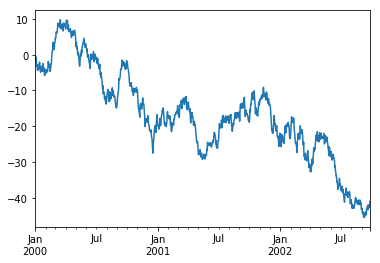

In [181]:
ts.plot()

In [182]:
# On a DataFrame, the plot() method is a convenience to plot all of the columns with labels:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=['A', 'B', 'C', 'D'])

In [183]:
df

,A,B,C,D
2000-01-01,0.130287,-0.330807,0.227448,-0.356873
2000-01-02,0.934509,1.008340,0.136353,-1.100382
2000-01-03,-0.075856,0.412319,0.072830,-0.341675
2000-01-04,-0.960976,0.047565,-1.103927,0.083760
2000-01-05,1.623675,-0.017566,-0.341594,-0.966775
...,...,...,...,...
2002-09-22,0.139105,-0.289311,-0.292181,-0.820898
2002-09-23,-0.089027,-0.447540,-0.255113,0.947922
2002-09-24,1.254757,-1.243777,-0.727661,-0.604032
2002-09-25,0.536722,1.828611,-0.892620,2.074538


In [185]:
df = df.cumsum()
df

,A,B,C,D
2000-01-01,0.130287,-0.330807,0.227448,-0.356873
2000-01-02,1.064796,0.677533,0.363801,-1.457255
2000-01-03,0.988940,1.089853,0.436631,-1.798930
2000-01-04,0.027964,1.137417,-0.667296,-1.715170
2000-01-05,1.651639,1.119851,-1.008889,-2.681946
...,...,...,...,...
2002-09-22,-12.552826,-17.709854,-33.621335,-7.246606
2002-09-23,-12.641853,-18.157394,-33.876448,-6.298684
2002-09-24,-11.387096,-19.401171,-34.604109,-6.902716
2002-09-25,-10.850373,-17.572559,-35.496729,-4.828178


In [190]:
import matplotlib.pyplot as plt
plt.figure()

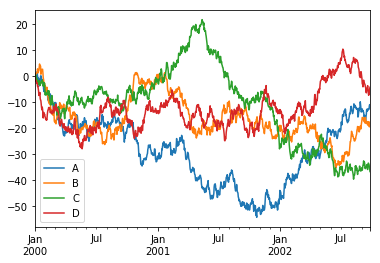

In [193]:
df.plot()

No handles with labels found to put in legend.


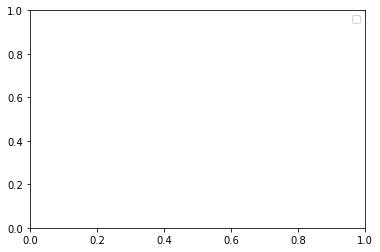

In [194]:
plt.legend(loc='best')

## Getting data in/out
### CSV

In [195]:
df.to_csv('foo.csv')

In [196]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.130287,-0.330807,0.227448,-0.356873
1,2000-01-02,1.064796,0.677533,0.363801,-1.457255
2,2000-01-03,0.988940,1.089853,0.436631,-1.798930
3,2000-01-04,0.027964,1.137417,-0.667296,-1.715170
4,2000-01-05,1.651639,1.119851,-1.008889,-2.681946
...,...,...,...,...,...
995,2002-09-22,-12.552826,-17.709854,-33.621335,-7.246606
996,2002-09-23,-12.641853,-18.157394,-33.876448,-6.298684
997,2002-09-24,-11.387096,-19.401171,-34.604109,-6.902716
998,2002-09-25,-10.850373,-17.572559,-35.496729,-4.828178


### HDF5

In [199]:
df.to_hdf('foo.h5', 'df')

In [201]:
pd.read_hdf('foo.h5')

,A,B,C,D
2000-01-01,0.130287,-0.330807,0.227448,-0.356873
2000-01-02,1.064796,0.677533,0.363801,-1.457255
2000-01-03,0.988940,1.089853,0.436631,-1.798930
2000-01-04,0.027964,1.137417,-0.667296,-1.715170
2000-01-05,1.651639,1.119851,-1.008889,-2.681946
...,...,...,...,...
2002-09-22,-12.552826,-17.709854,-33.621335,-7.246606
2002-09-23,-12.641853,-18.157394,-33.876448,-6.298684
2002-09-24,-11.387096,-19.401171,-34.604109,-6.902716
2002-09-25,-10.850373,-17.572559,-35.496729,-4.828178


### Excel

In [ ]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')  # not working

## Gotchas
If you are attempting to perform an operation you might see an exception like:

In [209]:
con = pd.Series([False, True, False])
con

0    False
1     True
2    False
dtype: bool

In [210]:
if con:
    print("I was True")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

## [10 minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html#categoricals)